# Create Animated Timeseries <img align="right" src="image/gistda.png" width="200" height="200">

Animations can serve as a potent technique for depicting transformations in the landscape over time using satellite imagery. The satellite data sourced from Sphere.gistda is particularly suitable for such animations, given its georeferencing, preprocessing to surface reflectance suitable for analysis, and organization into a spatial-temporal 'data cube'. This setup enables the extraction and visualization of landscape conditions in a uniform manner across different time frames.

<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="#"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
</table>

## Load Package

In [10]:
%matplotlib inline

import datacube
import sys
import skimage.exposure
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import Image
from dea_tools.plotting import xr_animation
from dream_river.plotimg import rgb, display_map
from dream_river.indices import cal_index

## Connect to datacobe

In [2]:
dc = datacube.Datacube(app='timeseries')

## Set parameter

In [3]:
# Set up a datacube query to load data for
query = {"x": (100.179, 100.247),      
         "y": (15.682, 15.728),
         'time': ('2016-01-01', '2017-12-30'),
         'measurements': ['red','green', 'blue','nir'],
         'output_crs': 'EPSG:32647',
         'resolution': (-30, 30)}

## Display study area

In [11]:
# Query bounding box
lat_range = (15.682, 15.728)
lon_range = (100.179, 100.247)

# display map
display_map(lon_range,lat_range)

## Load data

In [4]:
# Loading data using dc.load()
ds = dc.load(product="ls8_collections_sr_scene",**query)
ds

<xarray.Dataset>
Dimensions:      (time: 82, y: 172, x: 245)
Coordinates:
  * time         (time) datetime64[ns] 2016-01-07T03:37:26 ... 2017-12-27T03:...
  * y            (y) float64 1.739e+06 1.739e+06 ... 1.734e+06 1.734e+06
  * x            (x) float64 6.263e+05 6.264e+05 ... 6.336e+05 6.336e+05
    spatial_ref  int32 32647
Data variables:
    red          (time, y, x) int16 5490 5470 5462 5435 ... 7753 7887 7915 7919
    green        (time, y, x) int16 5589 5596 5576 5527 ... 7829 7961 8002 8000
    blue         (time, y, x) int16 5660 5664 5645 5588 ... 8207 8251 8267 8278
    nir          (time, y, x) int16 5946 5923 5936 5904 ... 7833 7957 7987 8001
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

## Explore Satellite images

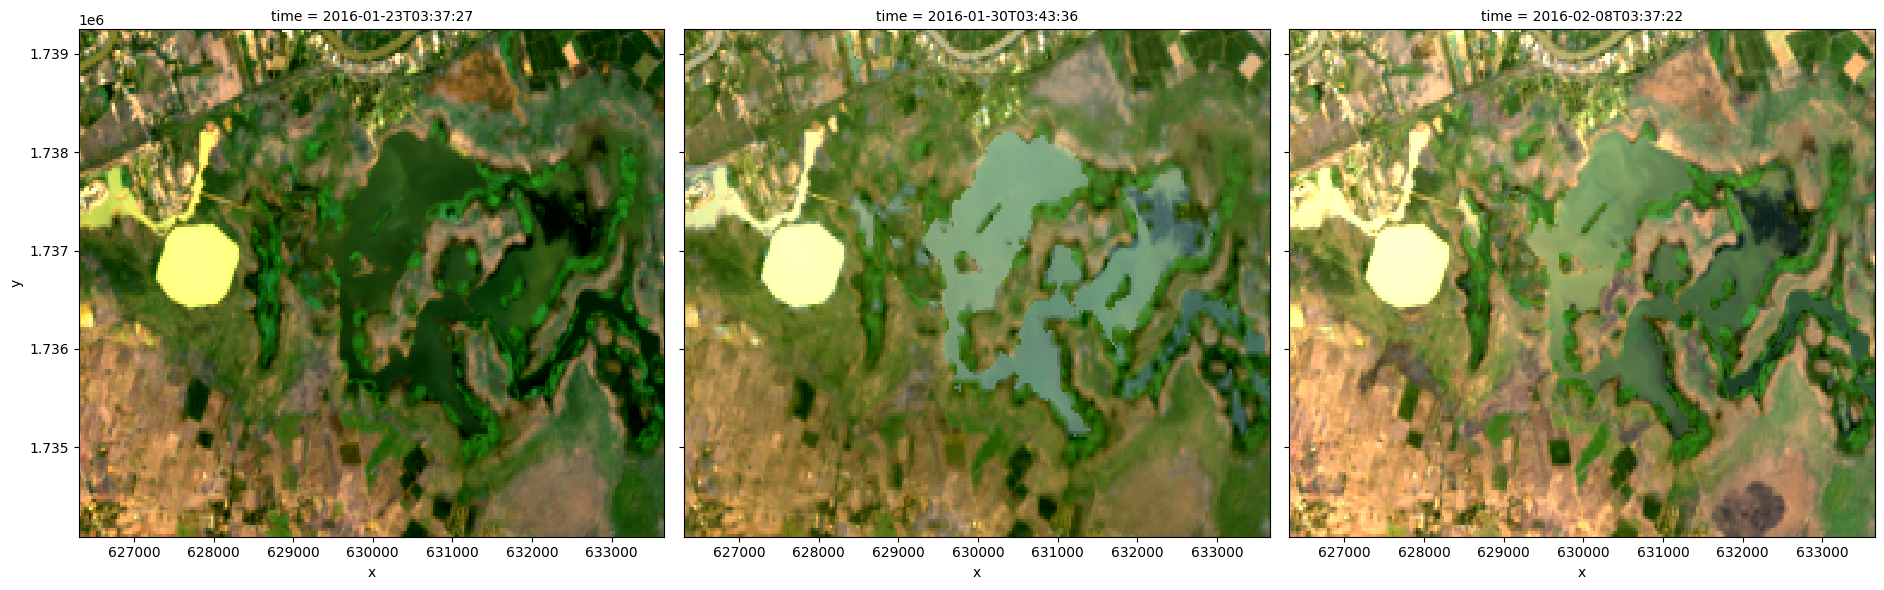

In [12]:
rgb(ds, index=[2,3,4])

## Calculate band Index

In [6]:
# Calculate multiple indices and drop original bands
ds_index = cal_index(ds, 
                    index=['NDWI','NDVI'],  
                    collection='ls8_collections_sr_scene')
# explore data
ds_index

<xarray.Dataset>
Dimensions:      (time: 82, y: 172, x: 245)
Coordinates:
  * time         (time) datetime64[ns] 2016-01-07T03:37:26 ... 2017-12-27T03:...
  * y            (y) float64 1.739e+06 1.739e+06 ... 1.734e+06 1.734e+06
  * x            (x) float64 6.263e+05 6.264e+05 ... 6.336e+05 6.336e+05
    spatial_ref  int32 32647
Data variables:
    red          (time, y, x) int16 5490 5470 5462 5435 ... 7753 7887 7915 7919
    green        (time, y, x) int16 5589 5596 5576 5527 ... 7829 7961 8002 8000
    blue         (time, y, x) int16 5660 5664 5645 5588 ... 8207 8251 8267 8278
    nir          (time, y, x) int16 5946 5923 5936 5904 ... 7833 7957 7987 8001
    NDWI         (time, y, x) float64 -0.03095 -0.02839 ... 0.0009381 -6.25e-05
    NDVI         (time, y, x) float64 0.03987 0.03976 ... 0.004528 0.005151
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

## Create Timeseries anmation

You can set the speed on gif image by adjust value in interval variable (like: interval=200, interval=300,...).

Exporting animation to animated_timeseries.gif


  0%|          | 0/82 (0.0 seconds remaining at ? frames/s)

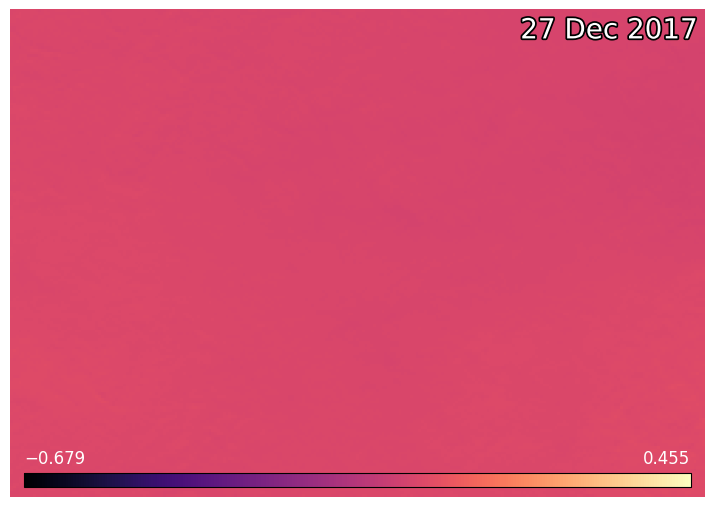

In [7]:
# Produce time series animation of red, green and blue bands
xr_animation(ds=ds_index, 
             bands=['NDWI'],
             output_path='animated_timeseries.gif',
             interval=400
             )


## Plot Timeseries animation in gif

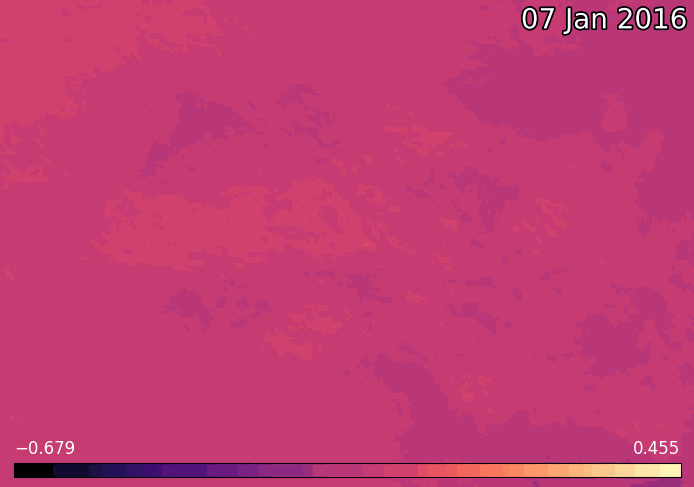

In [8]:
# Plot animation
plt.close()
Image('animated_timeseries.gif', embed=True)